<a href="https://colab.research.google.com/github/Susheel06/assignment1/blob/main/Assignment1_Ques1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QUESTION 1**

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import requests

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

#### Importing dataset from github repo:

In [12]:
!git clone https://github.com/Susheel06/assignment1.git

fatal: destination path 'assignment1' already exists and is not an empty directory.


#### Data loading:

In [13]:
df = pd.read_csv('/content/assignment1/winequality-red.csv')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Checking for Nan values:

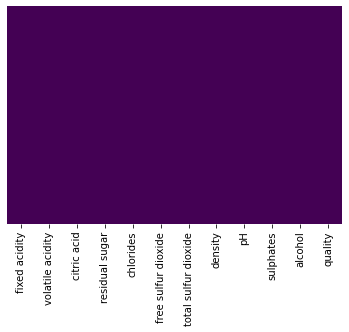

In [14]:
plt.figure()
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### Splitting the data into train and test data in the ratio 7:3:

In [15]:
train, test = tts(df, test_size = 0.3, shuffle= False)
# x, dummy = tts(x, test_size = 0.3, shuffle= False)

train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
y_train = train[['quality']]
x_train = train.drop(columns = ['quality'], axis = 1)

y_test = test[['quality']]
x_test = test.drop(columns = ['quality'], axis = 1)

y_train.head()

print(x_train.shape)
print(y_train.shape)

(1119, 11)
(1119, 1)


 ### Model: Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)

y_result = pd.DataFrame(data = model.predict(x_test), dtype=int)

##### RESULT 1: Sum of Squared error

In [18]:
from sklearn.metrics import mean_squared_error as mse
sse = mse(y_test, y_result)*y_train.shape[0]

print('Sum of squared error: %.2f' % sse)

Sum of squared error: 711.03


##### Pearson Corelation:

In [21]:
corr_matrix = df.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

x_train1 = x_train['alcohol']
x_train1 = np.reshape(x_train1.values, (1119,1))

x_test1 = x_test['alcohol']
x_test1 = np.reshape(x_test1.values, (480,1))

model = LinearRegression().fit(x_train1, y_train)

y_result = pd.DataFrame(data = model.predict(x_test1), dtype=int)

In [26]:
result = pd.DataFrame(data= x_test1, columns=['alcohol'])

result.insert(loc=1, column='quality', value= np.array(y_result.values))
result.drop_duplicates(subset= 'quality', inplace=True)
result.sort_values(by='quality', ascending=True, axis=0, inplace=True)

result.head(10)

,alcohol,quality
317,8.5,4
4,11.2,5
0,12.9,6
150,14.0,7


##### RESULT 2: Graph


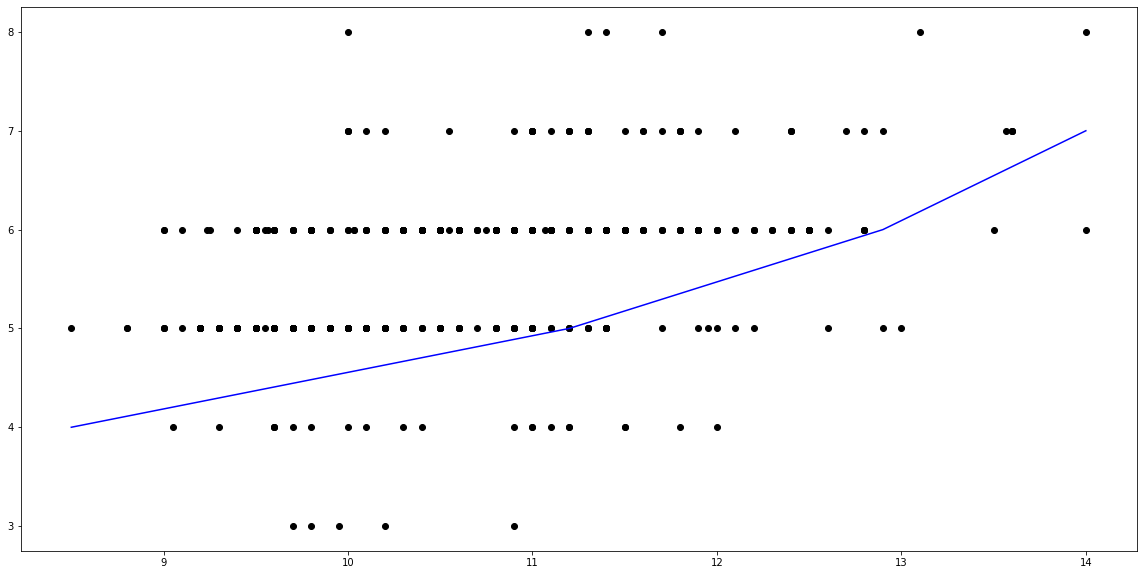

In [27]:
plt.figure(figsize=(20, 10))
plt.scatter(x_test1, y_test,  color='black')
plt.plot(result['alcohol'], result['quality'], color='blue')
plt.show()